#### Audio Classification Data Preprocessing

In [4]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='margot-to-biden.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
print(librosa_audio_data)

[ 0.00312359  0.01761106  0.01460335 ... -0.00028762 -0.00201098
 -0.00139788]


Matplotlib is building the font cache; this may take a moment.


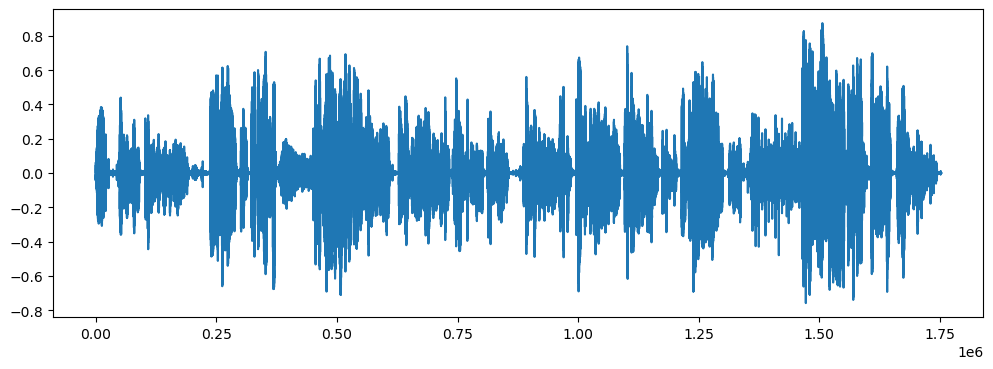

In [6]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 3424)


In [11]:
mfccs

array([[-2.6262241e+02, -2.3796228e+02, -2.2740407e+02, ...,
        -4.0214368e+02, -4.1446750e+02, -4.6300311e+02],
       [ 9.0756287e+01,  8.8328079e+01,  8.6590126e+01, ...,
         4.7994328e+00,  1.1693018e+01,  2.3126728e+01],
       [-4.6176090e+01, -4.2337914e+01, -3.8248249e+01, ...,
         1.1863838e+01,  1.2181353e+01,  1.3121024e+01],
       ...,
       [-1.6476598e+00, -3.4374361e+00,  8.7881923e-02, ...,
         3.2774279e+00,  2.4695158e-02, -1.4646848e+00],
       [-4.3646259e+00, -8.4139404e+00, -9.8409538e+00, ...,
        -8.0014753e-01,  7.2836703e-01,  5.1665339e+00],
       [-5.8055563e+00, -8.4537344e+00, -4.0863171e+00, ...,
        -3.8088470e+00, -1.7617812e+00,  2.0865564e+00]], dtype=float32)

In [76]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [140]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [141]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:08, 27.26it/s]C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [04:54, 38.45it/s]C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [05:08, 28.33it/s]


In [142]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [206]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [207]:
X.shape

(8732, 40)

In [208]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [209]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [211]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [148]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [126]:
X_train

array([[[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
          3.3314774e+00, -1.4786109e+00,  2.8736601e+00]],

       [[-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
         -3.3844023e+00, -5.2119045e+00, -1.5936136e+00]],

       [[-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
          2.0491767e+00, -8.0537486e-01,  2.7793026e+00]],

       ...,

       [[-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
          8.6335975e-01,  6.4766806e-01,  7.8490508e-01]],

       [[-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
          1.3777871e+00, -1.9530845e+00, -8.9652127e-01]],

       [[-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
         -5.1484952e+00, -3.6400862e+00, -1.3321606e+00]]], dtype=float32)

In [127]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [1]:
X_train.shape

NameError: name 'X_train' is not defined

In [129]:
X_test.shape

(1747, 1, 40)

In [130]:
y_train.shape

(6985, 10)

In [131]:
y_test.shape

(1747, 10)

### Model Creation

In [132]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [150]:
### No of classes
num_labels=y.shape[1]

In [151]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [152]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [153]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [181]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
195/219 [=========================>....] - ETA: 0s - loss: 0.8612 - accuracy: 0.7104
Epoch 00001: val_loss improved from inf to 0.65317, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8681 - accuracy: 0.7111 - val_loss: 0.6532 - val_accuracy: 0.7985
Epoch 2/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8822 - accuracy: 0.7145
Epoch 00002: val_loss did not improve from 0.65317
219/219 [==============================] - 1s 2ms/step - loss: 0.8762 - accuracy: 0.7151 - val_loss: 0.6665 - val_accuracy: 0.7951
Epoch 3/100
200/219 [==========================>...] - ETA: 0s - loss: 0.8449 - accuracy: 0.7205
Epoch 00003: val_loss did not improve from 0.65317
219/219 [==============================] - 1s 2ms/step - loss: 0.8508 - accuracy: 0.7187 - val_loss: 0.6554 - val_accuracy: 0.7939
Epoch 4/100
217/219 [============================>.] - ETA: 0s - loss: 0.8584 - accuracy: 0.7154
Epoch 0000

In [182]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8002289533615112


In [156]:
prediction_feature.shape

(1, 40)

In [190]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715336  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.9169518 ,  -18.795404  ,   -5.001721  ,
         -0.70152664,    2.91399   ,   -6.7105994 ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.57916117,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [185]:
model.predict_classes(X_test)

array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [215]:
filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-146.34639      52.85859       6.0391283    46.972637      0.48288426
   31.756617     -6.395756     36.949165     -2.2981966     9.0149975
   -8.056831     24.668858    -14.41076       7.5845594    -3.089655
   17.423319    -10.068965      9.606158     -1.4731672     7.745292
   -1.9399884    -1.5998945     3.373213      1.6671567    -4.9514785
    4.8195934    -6.1473813     3.8730834   -10.502274      1.3417107
   -5.616546      4.815169     -6.152183      2.0756485    -1.8508396
   -0.45990178   -4.9980536     2.528911     -0.7446382    -6.4779253 ]
[[-146.34639      52.85859       6.0391283    46.972637      0.48288426
    31.756617     -6.395756     36.949165     -2.2981966     9.0149975
    -8.056831     24.668858    -14.41076       7.5845594    -3.089655
    17.423319    -10.068965      9.606158     -1.4731672     7.745292
    -1.9399884    -1.5998945     3.373213      1.6671567    -4.9514785
     4.8195934    -6.1473813     3.8730834   -10.502274      1.3417107
    -5.616546 

array(['drilling'], dtype='<U16')

In [ ]:
bucket_name = 'audiofilesdata'
folders = ['REAL1', 'FAKE1']  # Add more folders if needed
output_file = 'output.csv'

In [ ]:
def process_folder(bucket_name, folder_name):
    s3 = boto3.client('s3')
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)
    
    features_list = []
    for obj in response.get('Contents', []):
        file_key = obj['Key']
        if file_key.endswith('.wav'):  # Assuming all files are WAV format
            file_name = f"/tmp/{file_key.split('/')[-1]}"  # Download to local /tmp directory
            s3.download_file(bucket_name, file_key, file_name)
            print(file_name)
            features = features_extractor(file_name)
            print(features)
            features_list.append([file_key, folder_name] + features.tolist())
            os.remove(file_name)  # Remove the downloaded file to save disk space
    
    return features_list